In [1]:
from scipy.integrate import odeint
from scipy.sparse import diags
from matplotlib import pyplot as plt, cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


In [2]:
# Successive Over-Relaxation (SOR) method to solve Laplace equation
# so fasttttt
#from pylab import imshow,gray,show


#set up grid
nx,ny = 100,100
x = np.linspace(0, nx, nx + 1)
y = np.linspace(0, ny, ny + 1)
X, Y = np.meshgrid(x, y)
L = 1
delta = L/nx


#charge density
rho = np.zeros([nx+1,ny+1],float)
rho[40:60,:] = 1e4 #C/m^2
epsilon = 8.85e-12 #F/m

#time steps
steps = 100
dt = 1e-1

#magnetic field
B = 0.1 #Tesla

In [3]:
#create the A matrix
def create_A(nx,ny):
    A = np.zeros(((nx-1)*(nx-1),(ny-1)*(ny-1)),float)
    np.fill_diagonal(A,-4)
    np.fill_diagonal(A[:-1,1:],1)
    np.fill_diagonal(A[1:,:-1],1)

    # fill the identity matrix after first 100 rows
    # fill the identity matrix after first 100 columns
    np.fill_diagonal(A[nx-1:,:-(nx-1)],1)
    np.fill_diagonal(A[:-(nx-1),nx-1:],1)

    # fill 0s for the corners of T
    for i in range (1,(nx-1)*(nx-1)):
        for j in range (1,(ny-1)*(ny-1)):
            if (i)%(nx-1) == 0 and (j+1)%(ny-1) == 0:
                A[i,j] = 0
            if (i+1)%(nx-1) == 0 and (j)%(ny-1) == 0:
                A[i,j] = 0

    return A

def create_sparse_tridiagonal(nx, ny):
    num_diag = (nx-1)*(nx-1)
    diag = np.full(num_diag, -4)
    lower = np.full((num_diag-1),1)
    upper = np.full((num_diag-1),1)
    identity = np.full(num_diag-(nx-1),1)

    lower[nx-2::nx-1] = 0
    upper[nx-2::nx-1] = 0


    diagonal = [diag,lower,upper,identity,identity]
    offsets = [0,-1,1,-(nx-1),(nx-1)]

    return diags(diagonal, offsets, shape =(num_diag, num_diag), format= 'csr')
  #  return diags(diagonal, offsets, shape =(num_diag, num_diag)).toarray()



"""
A = create_sparse_tridiagonal(nx,ny)
B = create_A(nx,ny)
print (B )
print ("\n")
print (A)
"""




'\nA = create_sparse_tridiagonal(nx,ny)\nB = create_A(nx,ny)\nprint (B )\nprint ("\n")\nprint (A)\n'

In [4]:
#construct boundary vector B
def create_B():
    lil_B1 = np.zeros(((nx-1)*(ny-1),1),float)
    lil_B2 = np.zeros(((nx-1)*(ny-1),1),float)
    f = rho[1:nx,1:ny].reshape((nx-1)*(ny-1),1)*delta**2/epsilon

    lil_B1[0:nx-1] = -rho[0,1:ny].reshape(nx-1,1)
    lil_B1[(nx-1)*(ny-1)-(nx-1):(nx-1)*(ny-1)] = -rho[nx,1:ny].reshape(nx-1,1)

    lil_B2[0:(nx-1)*(ny-1):(ny-1)] = -rho[1:nx,0].reshape(nx-1,1)
    lil_B2[ny-2:(nx-1)*(ny-1):(ny-1)] = -rho[1:nx,ny].reshape(nx-1,1)

    return lil_B1+lil_B2+f


def solve_poisson(rho):
    A = create_sparse_tridiagonal(nx,ny)
    B = create_B()
    rho_interior = rho[1:nx,1:ny].reshape((nx-1)*(ny-1),1)

    A_inv = np.linalg.inv(A.toarray())
    rho_interior = np.dot(A_inv,B)
    rho[1:nx,1:ny] = rho_interior.reshape(nx-1,ny-1)
    return rho
    

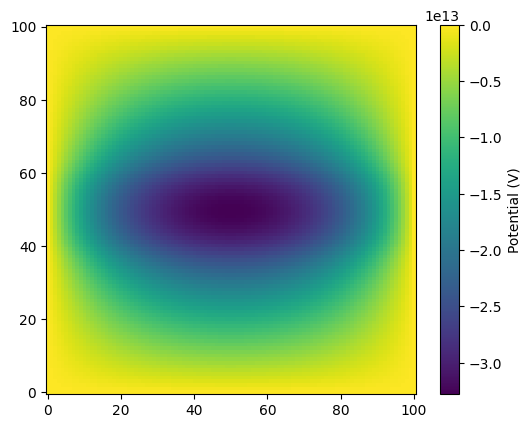

In [ ]:
plt.imshow(rho_interior, origin = 'lower')
plt.colorbar(label="Potential (V)",shrink=1)
